# Машинное обучение, DS-поток, осень 2022
# Задание 3.2. PCA, UMAP

In [609]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2', style='white', context='poster')

import umap
import sys
sys.path.append('/Users/liz/fashion-mnist/utils')
import mnist_reader
from sklearn.decomposition import PCA
import scipy as sp


### Задача 1

Пусть $X_1 , ..., X_n$ &mdash; выборка в пространстве $\mathbb{R}^D$ , а $Y_1, ..., Y_n$ &mdash; ее проекция на линейное подпространство размерности $d < D$. Докажите, что величина
$$\sum_{i=1}^{n} (X_i - Y_i)^2$$
минимальна, если $Y_1, ..., Y_n$ &mdash; проекция на линейное подпространство, образованное первыми $d$ главными компонентами. 

Чему она равна?

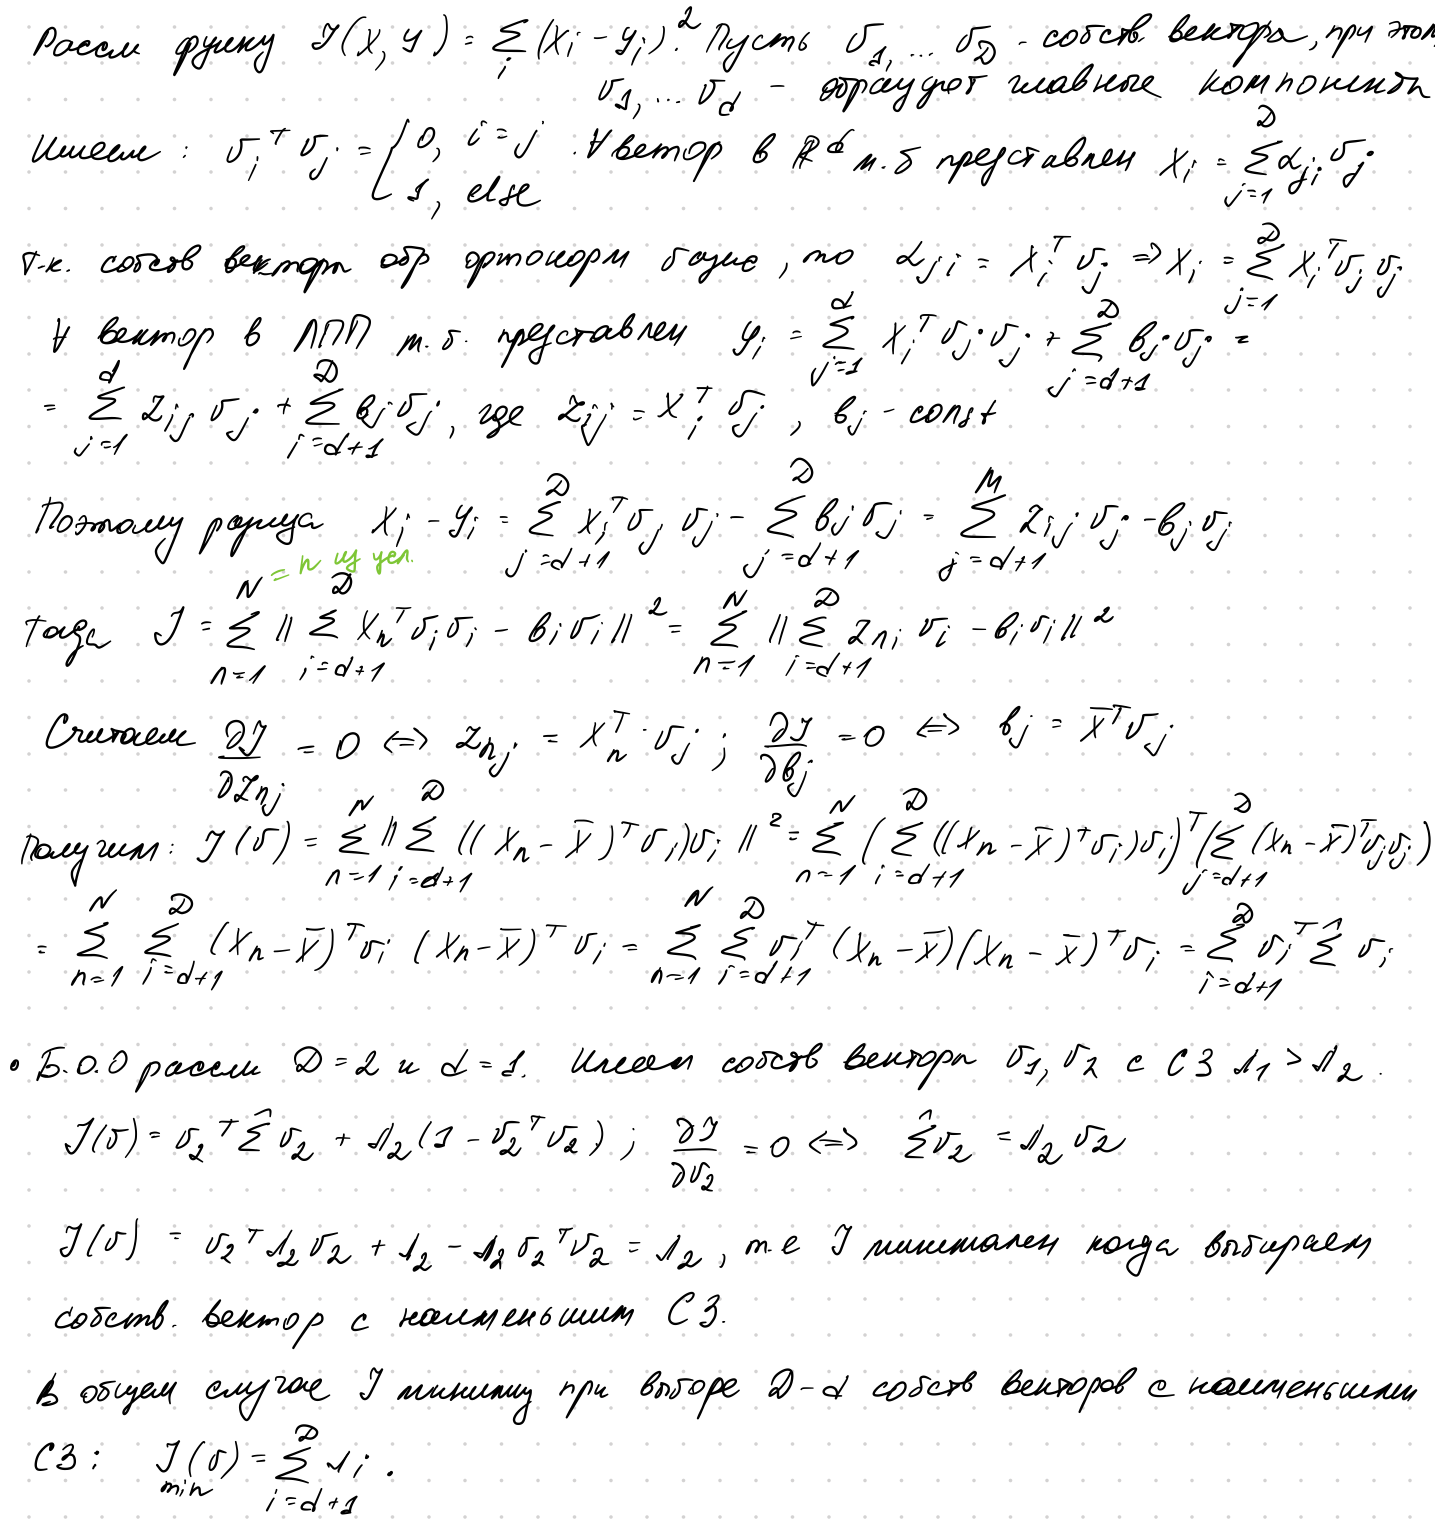

---
### Задача 2

Fashion-MNIST — набор данных изображений одежды, обуви и аксессуаров, состоящий из обучающего набора из 60 000 изображений и тестового набора из 10 000 изображений. Каждое изображение имеет размер 28x28 пикселей в оттенках серого.

Скачайте <a href="https://github.com/zalandoresearch/fashion-mnist">репозиторий</a> и загрузите данные с помощью скрипта `utils/mnist_reader.py`.

In [610]:
X_train, y_train = mnist_reader.load_mnist(
    '/Users/liz/fashion-mnist/data/fashion', kind='train'
)
X_test, y_test = mnist_reader.load_mnist(
    '/Users/liz/fashion-mnist/data/fashion', kind='t10k'
)

Объединим все данные и зададим названия классов

In [611]:
data = np.array(np.vstack([X_train, X_test]), dtype=np.float64) / 255.0
target = np.hstack([y_train, y_test])
classes = [
    'Футболки/топы',
    'Брюки',
    'Свитеры',
    'Платья',
    'Пальто',
    'Сандалии',
    'Рубашки',
    'Кроссовки',
    'Сумки',
    'Сапоги'
]

Посмотрите на размер данных и напечатайте несколько изображений

In [612]:
data.shape

(70000, 784)

*Всего 784 признака, то есть размерность изображения: $28 \times 28$.*

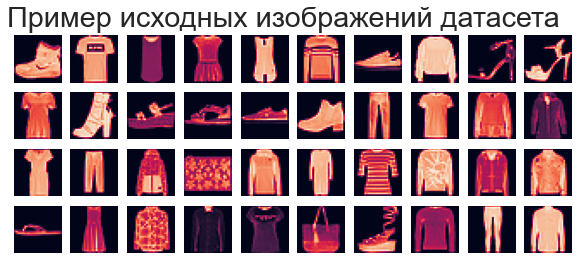

In [613]:
pic_size = int(np.sqrt(784))

plt.figure(figsize=(10, 4))

for i in range(40):
    plt.subplot(4, 10, i + 1)
    plt.imshow(data[i].reshape(pic_size, pic_size))
    plt.axis('off')

plt.suptitle('Пример исходных изображений датасета');

UMAP для сжатия в двумерное пространство. Не забывайте про особенности моделей и про смысл их гиперпараметров.

__Пояснение выбора параметров__

*В качестве гиперпараметров для **базового случая** будем использовать дефолтные: евклидова метрику расстояния, `n_components`=2, `min_dist` и недефолтное значение для `n_neighbors`=5 (оно меньше дефолтного 15), чтобы сконцентрироваться на локальных струтурах*

In [614]:
embedding = umap.UMAP(n_neighbors=5).fit_transform(data)

Визуализируйте полученные результаты. В качестве цвета точки используйте ее класс. Не забудьте добавить легенду или colorbar.

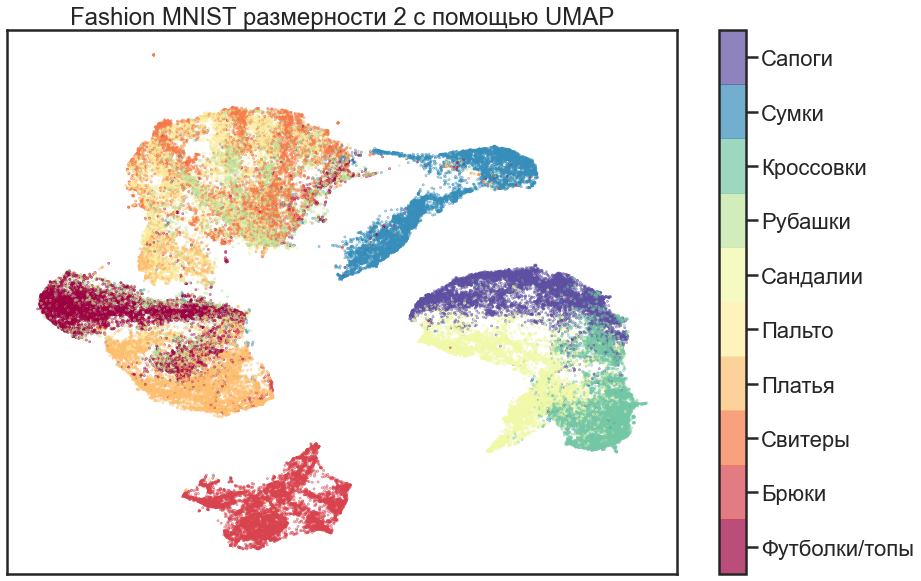

In [615]:
fig, ax = plt.subplots(1, figsize=(15, 10))
plt.scatter(*embedding.T, s=0.5, c=target, cmap='Spectral', alpha=0.7)
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST размерности 2 с помощью UMAP')
plt.setp(ax, xticks=[], yticks=[]);

Проинтерпретируйте полученные результаты. Удалось ли выделить кластеры? Что можно сказать про взаиморасположение кластеров в двумерном пространстве?

*Визуально результат неплохой, глобально кластеры достаточно хорошо разделены (например брюки от рубашек, обувь отдельно от других кластеров), однако нет хорошего разделения между типами обуви (сандали/сапоги/кроссовки), футболки, рубашки, платья, пуловеры и пальто немного смешаны. Хуже всего разделены пальто, рубашки и свитеры, что неудевительно, так как они очень похожи. В целом можно сказать, что группы кластеров по похожим типам одежды отстоят друг от друга на примерно одинаковых расстояниях, но сами кластеры друг от друга отделены плохо*

Обучите UMAP, передав ему также метки классов, и визуализируйте результаты. Как изменились результаты?

__Пояснение выбора параметров__


*Тут будем использовать повышенное (по сравнению с предыдцщим) значение для параметра, так как использование более высокого значения рекомендуется при использовании понижения порядка с учителем (supervised), но не слишком высокое, чтобы сохранить внутреннюю структуру кластера.*

*Сначала на дефолтном значении:*

In [639]:
embedding_supervised = umap.UMAP(n_neighbors=15).fit_transform(data, y=target)

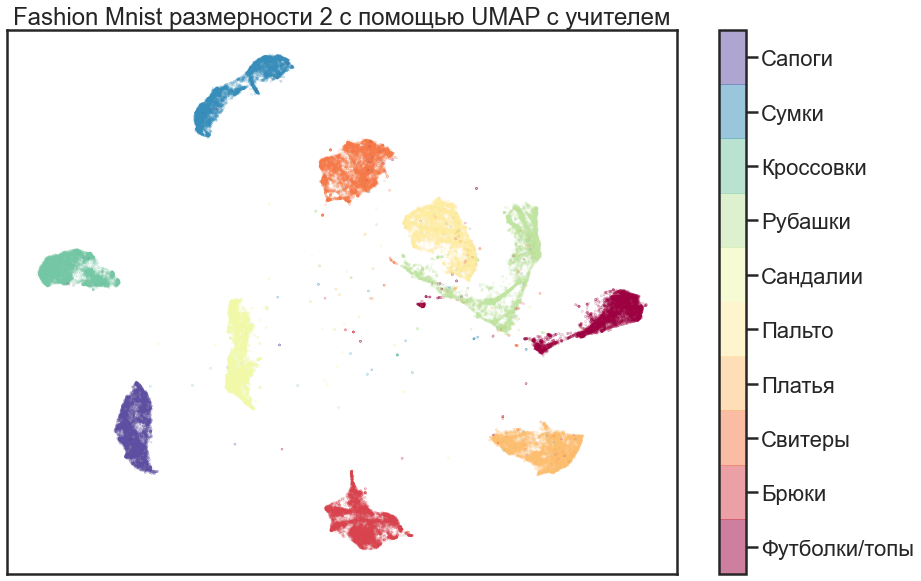

In [640]:
fig, ax = plt.subplots(1, figsize=(15, 10))
plt.scatter(*embedding_supervised.T, s=0.1, c=target, cmap='Spectral', alpha=0.5)
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.setp(ax, xticks=[], yticks=[])
plt.title('Fashion Mnist размерности 2 с помощью UMAP c учителем');

In [641]:
embedding_supervised = umap.UMAP(n_neighbors=13).fit_transform(data, y=target)

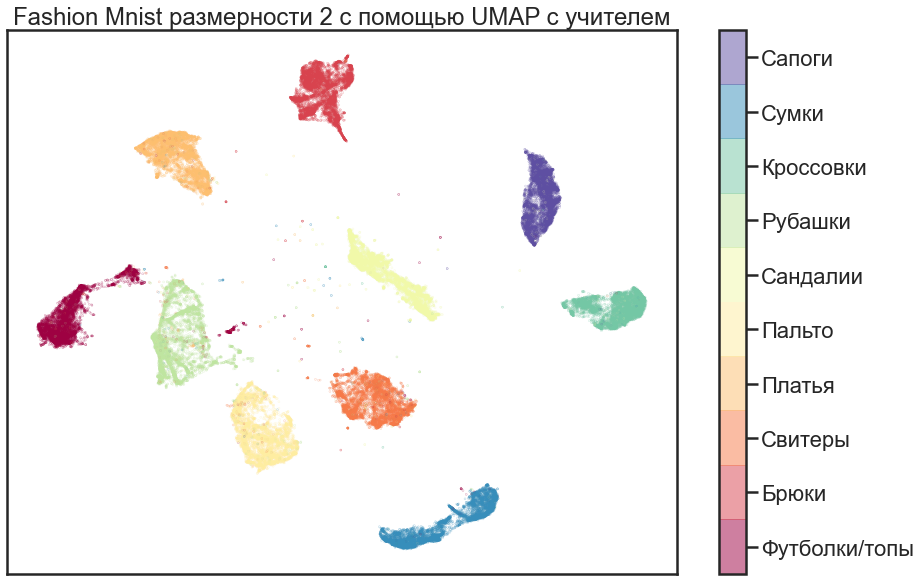

In [642]:
fig, ax = plt.subplots(1, figsize=(15, 10))
plt.scatter(*embedding_supervised.T, s=0.1, c=target, cmap='Spectral', alpha=0.5)
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.setp(ax, xticks=[], yticks=[])
plt.title('Fashion Mnist размерности 2 с помощью UMAP c учителем');

*В случае `n_neighbors=13` кластеры выделяются лучше.*

*В результате получается четко разделенный набор классов и немного шума. Помимо хорошего разделения классов, заметно что сохранилась внутренняя структура классов. Например, рубашки и свитеры так же состоят из полосок, и в целом классы сохранили ту же форму, что и в базовом случае. Так же сохранилась глобальная структара: все классы обуви находятся рядом друг с другом, брюки и сумки находятся на противоположных сторонах, сохранилась "дуга" пуловеров, рубашек, футболок и платьев.*

**Вывод**: *Suprvized UMAP дает более качественную кластеризацию (что и следовало ожидать, так как данные размечены), чем unsuprvized, при этом сохраняя внутреннюю и глобальную структуру классов.*

---
### Задача 3

Рассмотрим датасет **Leaf Classification**:
	
https://www.kaggle.com/c/leaf-classification
	
Данные содержат 1584 изображений образцов листьев (16 изображений для 99 видов). По ссылке доступно подробное описание данных. Для вашего удобства размер	некоторых изображении был изменен, в результате чего все изображения имеют одинаковый размер $170 \times 250$. 
* Скачайте файл с данными на сайте курса.
* Загрузите все изображения с помощью `plt.imread` и визуализируйте некоторые из них. Каждое изображение &mdash; матрица размера $170 \times 250$.
* В файле `train_labels.csv` указаны номера образцов листьев, которые относятся к обучающей части данных, а так же их виды. Разделите данные на обучающую и тестовую часть.
* На обучающей части данных постройте 30 главных компонент. Какую долю дисперсии данных они объясняют? Какую долю дисперсии объясняет каждая компонента отдельно?
* Визуализируйте главные компоненты. Можете ли вы их как-то охарактеризовать?
* Визуализируйте обучающую часть данных в проекции на две первых главных компоненты. Цвет точки должен соответствовать виду образца. Используйте `cmap=’Set1’` во избежании градации цвета по номеру вида. Наблюдаются ли какие-либо закономерности?
* Визуализируйте данные при помощи UMAP двумя способами — на основе исходных признаков (пиксели) и по проекциям на первые 30 главных компонент. Кластеризуются ли точки?


In [643]:
labels_df = pd.read_csv('./train_labels.csv')

In [644]:
labels_df

,id,species
0,1,Acer_Opalus
1,2,Pterocarya_Stenoptera
2,3,Quercus_Hartwissiana
3,5,Tilia_Tomentosa
4,6,Quercus_Variabilis
...,...,...
985,1575,Magnolia_Salicifolia
986,1578,Acer_Pictum
987,1581,Alnus_Maximowiczii
988,1582,Quercus_Rubra


In [645]:
labels = labels_df['species']

In [646]:
img_width = 250
img_hight = 170
n_total = 1584

In [647]:
img_matrix = np.zeros((n_total, img_hight, img_width))

for i in range(n_total):
    img = plt.imread('./Leaf_Images/scaled_images/{}.jpg'.format(i+1))
    img_matrix[i] = img

In [685]:
train_ids = labels_df.id - 1
test_ids = np.setdiff1d(range(n_total), (labels_df.id - 1))

In [648]:
X_train = img_matrix.reshape((n_total, img_hight*img_width))[train_ids]
X_test = img_matrix.reshape((n_total, img_hight*img_width))[test_ids]

In [649]:
n_train = X_train.shape[0]

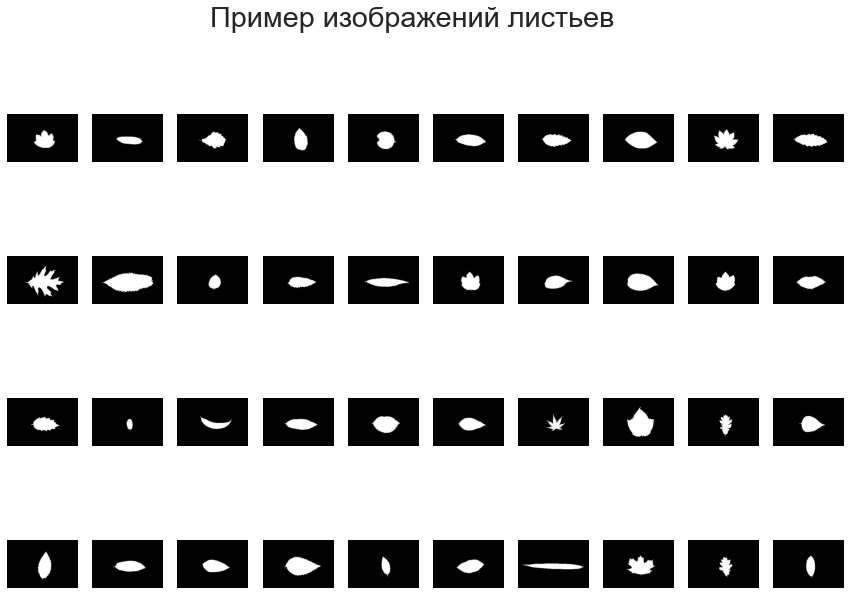

In [650]:
plt.figure(figsize=(15, 10))

for i in range(1, 41):
    plt.subplot(4, 10, i)
    plt.imshow(img_matrix[i-1], cmap='gray')
    plt.axis('off')

plt.suptitle('Пример изображений листьев');

На обучающей части данных постройте 30 главных компонент. Какую долю дисперсии данных они объясняют? Какую долю дисперсии объясняет каждая компонента отдельно?

In [651]:
pca = PCA(n_components=30)
transform_X = pca.fit_transform(X_train)

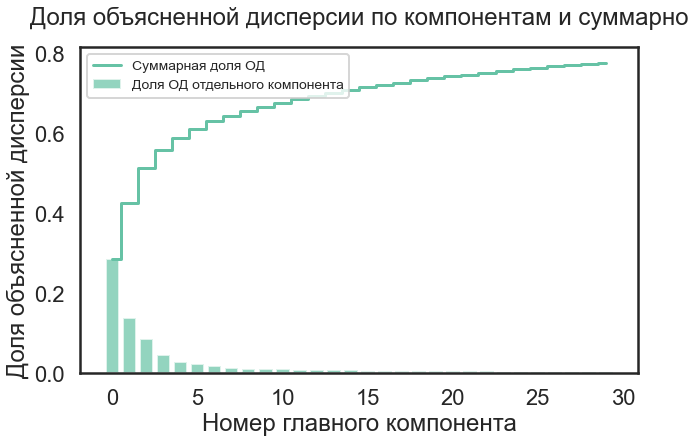

In [652]:
plt.figure(figsize=(10, 6))
explained_variance_cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.7, 
        align='center', label='Доля ОД отдельного компонента')
plt.step(range(len(explained_variance_cumsum)), explained_variance_cumsum, where='mid', label='Cуммарная доля ОД')
plt.ylabel('Доля объясненной дисперсии')
plt.xlabel('Номер главного компонента')
plt.legend(loc='upper left', fontsize='xx-small')
plt.title('Доля объясненной дисперсии по компонентам и суммарно', y=1.05);

In [653]:
print('Суммарная доля объясненной дисперсии: ', cum_sum_eigenvalues[-1])

Суммарная доля объясненной дисперсии:  0.8947007388682949


Визуализируйте главные компоненты. Можете ли вы их как-то охарактеризовать?

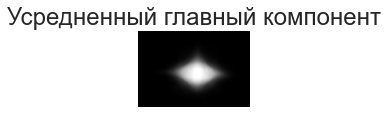

In [654]:
plt.figure(figsize=(2, 2))
plt.imshow(pca.mean_.reshape((img_hight, img_width)), cmap='gray')
plt.axis('off')
plt.title('Усредненный главный компонент');

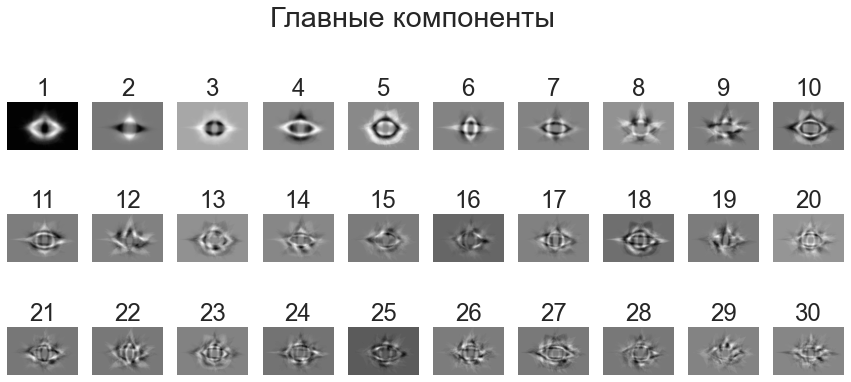

In [655]:
plt.figure(figsize=(15, 10))   

for i in range(30):
    plt.subplot(5, 10, i + 1)
    plt.imshow(pca.components_[i].reshape((img_hight, img_width)), cmap='gray')
    plt.axis('off')
    plt.title('{}'.format(i+1))
plt.suptitle('Главные компоненты');

**Первая компонента**, похоже, отвечает за **радиус листа** (похожа на расширяющийся эллипсоид), а **вторая** - за **ориентацию** (четко выделяются 2 области - темная и светлая, перпендикулярные друг другу)

In [656]:
X_hat = pca.inverse_transform(transform_X)

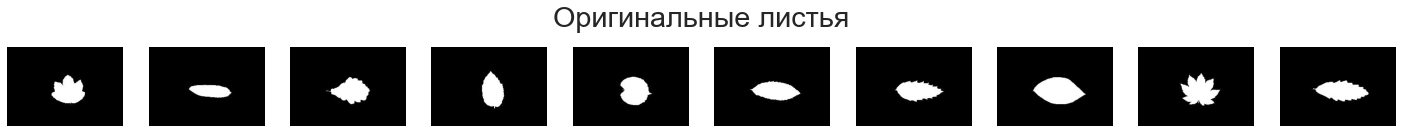

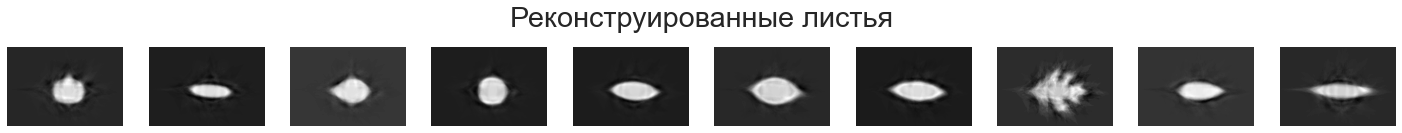

In [657]:
plt.figure(figsize=(20, 15))

for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.imshow(img_matrix[i-1], cmap='gray')
    plt.axis('off')
plt.suptitle('Оригинальные листья', y=0.55)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 15))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.imshow(X_hat[i-1].reshape(img_hight, img_width), cmap='gray')
    plt.axis('off')
plt.suptitle('Реконструированные листья', y=0.55)
plt.tight_layout()

plt.show()
    

Визуализируйте обучающую часть данных в проекции на две первых главных компоненты. Цвет точки должен соответствовать виду образца. Используйте cmap=’Set1’ во избежании градации цвета по номеру вида. Наблюдаются ли какие-либо закономерности?

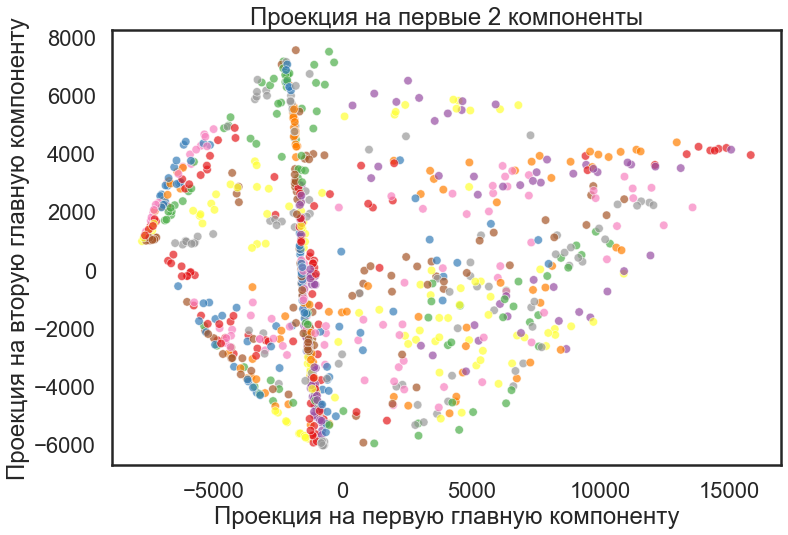

In [658]:
pca_2 = PCA(n_components=2)
Y = pca_2.fit_transform(X_train)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=Y[:, 0], y=Y[:, 1], hue=labels, palette='Set1', size=0.5, alpha=0.7)
plt.xlabel('Проекция на первую главную компоненту')
plt.ylabel('Проекция на вторую главную компоненту')
plt.title('Проекция на первые 2 компоненты')
plt.legend([],[], frameon=False);

- *Видно, что самые ближайшие точки друг к другу одинакового цвета, то есть это листья одного вида. Значит, после PCA даже на 2х компонентах возможна хоть сколько-нибудь хорошая классификация.*
- *Выдедяются 4 более плотных области: 2 почти перпендикулярные друг другу и 2 по краям. Можно проинтерпретировать так: в вертикальной полоске близко лежат листья одних видов с одинаковым радиусом, немного разной ориентации(сфотографироли немного по-разному); горизонтальная: листья одних видов имеют примерно одну ориентацию, но немного различные радиусы. Аналогично можно сказать и про остальные области. То есть на графике хорошо заметна* ***вариативность листьев внутри одного вида.***

Визуализируйте данные при помощи UMAP двумя способами — на основе исходных признаков (пиксели) и по проекциям на первые 30 главных компонент. Кластеризуются ли точки?

In [659]:
embedding_orig = umap.UMAP(n_neighbors=10).fit_transform(X_train, y=(labels_df.id - 1))

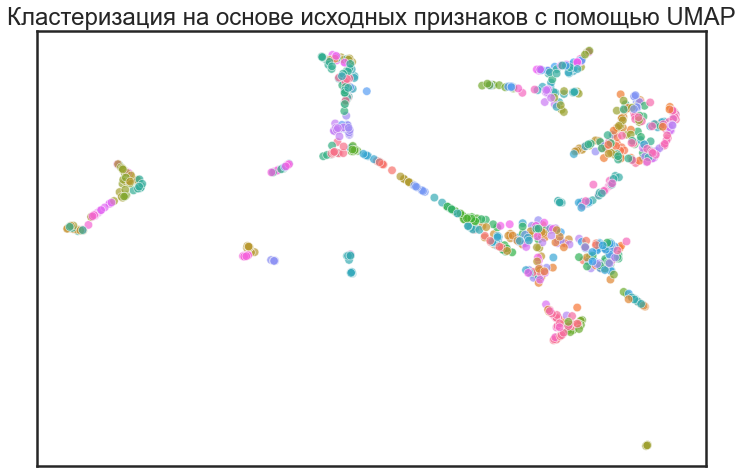

In [660]:
fig, ax = plt.subplots(1, figsize=(12, 8))
sns.scatterplot(x=embedding_orig[:, 0], y=embedding_orig[:, 1], size=0.5, hue=labels, cmap='Spectral', alpha=0.7)
plt.title('Кластеризация на основе исходных признаков с помощью UMAP')
plt.setp(ax, xticks=[], yticks=[])
plt.legend([],[], frameon=False);

In [661]:
embedding_comp = umap.UMAP(n_neighbors=10).fit_transform(transform_X, y=(labels_df.id - 1))

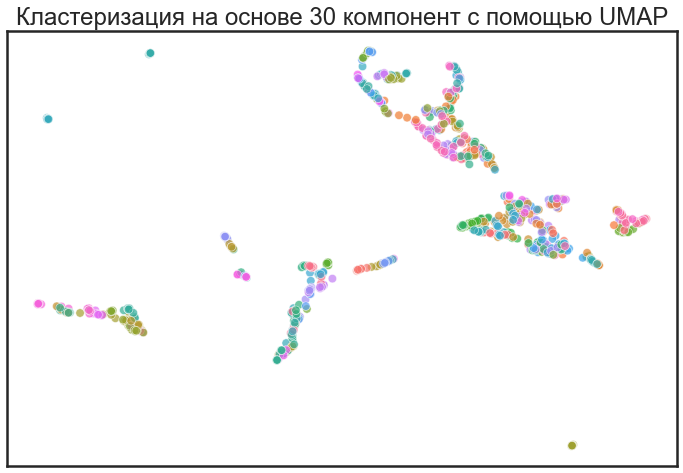

In [662]:
fig, ax = plt.subplots(1, figsize=(12, 8))
sns.scatterplot(x=embedding_comp[:, 0], y=embedding_comp[:, 1], size=0.5, hue=labels, cmap='Spectral', alpha=0.7)
plt.title('Кластеризация на основе 30 компонент с помощью UMAP')
plt.setp(ax, xticks=[], yticks=[])
plt.legend([],[], frameon=False);

*В обоих случаях кластеры получились невыпуклые, но кластеризация на основе главных компонент лучше - кластеров меньше и они кучнее и дальше друг от друга.*

In [731]:
test_df = pd.read_csv('./train.csv')
test_df

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


*Кластеры на тестовой выборке:*

In [721]:
embedding_ = umap.UMAP(n_neighbors=10).fit(X_train, y=(labels_df.id - 1))
res = embedding_.transform(X_test)

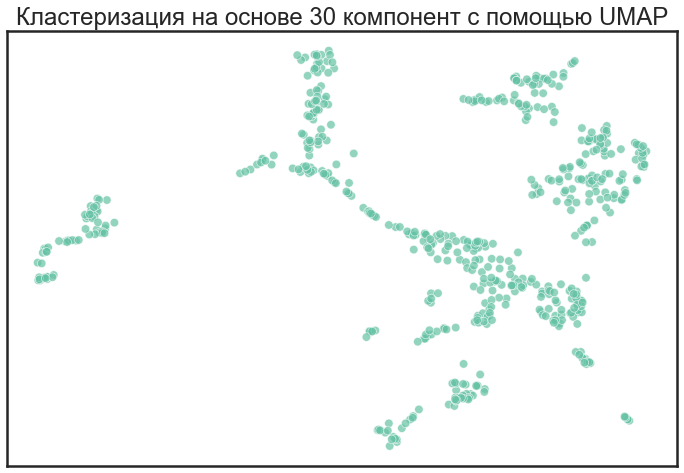

In [732]:
fig, ax = plt.subplots(1, figsize=(12, 8))
sns.scatterplot(x=res[:, 0], y=res[:, 1], size=0.5, cmap='Set 2', alpha=0.7)
plt.title('Кластеризация на основе 30 компонент с помощью UMAP')
plt.setp(ax, xticks=[], yticks=[])
plt.legend([],[], frameon=False);

*На тестовой выборке есть отдельные кластеры, но в целом выделяются сильно хуже*

**Вывод:** *PCA хорошо использовать как предобработку выборок с элементами больших размерностей перед классификацией и кластеризацией - понижая размерность, можно улучшить их качество.*